In [2]:
from platform import python_version

print(python_version())

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem

from mendeleev import element

#import chemcoord as cc

from rdkit import Chem
import seaborn as sns
import pandas as pd
import numpy as np
import shutil
import glob
import csv
import ast
import os
import re
from astroquery.linelists.cdms import CDMS
import astropy.units as u
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
#import rmsd

#sns.set_context('poster', font_scale=1.1)
#pd.set_option('display.max_rows', None)  

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

3.10.6


In [1]:
## get lines from CDMS ## phosphine
table = CDMS.query_lines(min_frequency=0*u.MHz,
                         max_frequency=6e6*u.MHz,
                         min_strength=-10,
                         temperature_for_intensity=300,
                         molecule="034501 PH3") 

table[table['F']=='0 0']

NameError: name 'CDMS' is not defined

# Compare Plot: Propargyl Cyanide

In [22]:
## load computed pgopher linelist 
comp_loc = '/Users/z5380625/Desktop'
#comp_data = pd.read_csv(comp_loc+'/propargylcyanide.csv')
#comp_data


In [23]:
## load observed pgopher linelist
comp_loc = '/Users/z5380625/Desktop'
#observed_data = pd.read_csv(comp_loc+'/propargylcyanide_observed.csv')
#observed_data


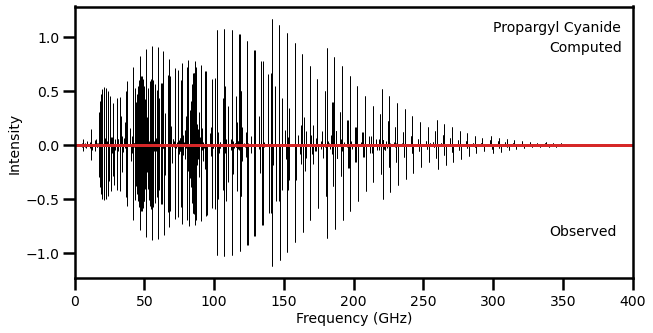

In [344]:
## plot pgopher vs CDMS

fig, ax = plt.subplots(figsize=(10,5))

markers,stems,base = ax.stem(comp_data['Position']/1e3,comp_data['Intensity'],markerfmt=' ',linefmt='k-')
plt.setp(stems, 'linewidth', 1)
markers,stems,base = ax.stem(observed_data['Position']/1e3,-observed_data['Intensity'],markerfmt=' ',linefmt='k-')
plt.setp(stems, 'linewidth', 1)
ax.set_xlim(0,400)
#ax.set_ylim(-6,6)

ax.set_xlabel('Frequency (GHz)', fontsize=14)
ax.set_ylabel('Intensity',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)




ax.text(0.75, 0.95, 'Propargyl Cyanide', transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
ax.text(0.85, 0.2, 'Observed', transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
ax.text(0.85, 0.875, 'Computed', transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
plt.savefig('/Users/z5380625/Documents/Research/2_BigData/Plots/propargylcyanide_compare.pdf',bbox_inches='tight')
plt.show()



In [111]:
print(np.sqrt(2.87**2+2.2**2))

3.616199662629264


In [40]:
print((134406.6906824+134400.4584420)/2)

134403.5745622


In [166]:
print(len(list(observed_data['Position'].values)))

2135


In [167]:
print(len(list(comp_data['Position'].values)))

2133


In [346]:
QNs_list = []
for QNs_string in list(observed_data['Label'].values):
    QNs = QNs_string.split()
    QNs_list.append((int(QNs[1]),int(QNs[2]),int(QNs[3]),int(QNs[6]),int(QNs[7]),int(QNs[8])))
print(len(QNs_list))
observed_data['Label'] = QNs_list


2135


In [350]:
comp_label_list = list(comp_data['Label'].values)
observed_label_list = list(observed_data['Label'].values)

comp_freq_list = list(comp_data['Position'].values)
observed_freq_list = list(observed_data['Position'].values)

n_4=0
n_6=0
n_10=0
n_20=0
n_30=0
sum_diff_sq_4 = 0
sum_diff_sq_6 = 0
sum_diff_sq_10 = 0
sum_diff_sq_20 = 0
sum_diff_sq_30 = 0
J_list = []

for label in observed_label_list:
    J_list.append(label[3])
    try:
        index_comp = comp_label_list.index(label)
        index_obs = observed_label_list.index(label)
        if label[3] < 4:
            
            sum_diff_sq_4 += (comp_freq_list[index_comp]-observed_freq_list[index_obs])**2
            n_4+=1
        elif label[3] < 6:
            sum_diff_sq_6 += (comp_freq_list[index_comp]-observed_freq_list[index_obs])**2
            n_6+=1
        elif label[3] < 10: 
            sum_diff_sq_10 += (comp_freq_list[index_comp]-observed_freq_list[index_obs])**2
            n_10+=1
        elif label[3] < 20: 
            sum_diff_sq_20 += (comp_freq_list[index_comp]-observed_freq_list[index_obs])**2
            n_20+=1
        elif label[3] < 30: 
            sum_diff_sq_30 += (comp_freq_list[index_comp]-observed_freq_list[index_obs])**2
            n_30+=1
        
    except:
        #index_obs = observed_label_list.index(label)
        #sum_diff_sq += (observed_freq_list[index_obs])**2
        print(label,index_obs)
print(n)
print(np.sqrt(sum_diff_sq_4/n_4))
print(np.sqrt(sum_diff_sq_6/n_6))
print(np.sqrt(sum_diff_sq_10/n_10))
print(np.sqrt(sum_diff_sq_20/n_20))
print(np.sqrt(sum_diff_sq_30/n_30))

(18, 2, 16, 19, 1, 19) 0
(10, 5, 5, 10, 0, 10) 1777
(19, 8, 11, 19, 5, 14) 2084
(19, 8, 12, 19, 5, 15) 2084
(10, 8, 3, 9, 5, 4) 2112
(10, 8, 2, 9, 5, 5) 2112
2129
132.37843854641758
342.1212615069073
779.9872714726974
2010.9292578009417
1711.2898338082646


# Plot Conformers for C3HNO2

In [59]:
## load computed pgopher linelist 
comp_loc = '/Users/z5380625/Desktop/'
comp_data_2 = pd.read_csv(comp_loc+"C3HNO3_CONF2.dat", header=None, delimiter=r"	 ")
freqs_2 = comp_data_2.iloc[:,0].values/1000
intens_2 = comp_data_2.iloc[:,1].values*0.65

comp_data_1 = pd.read_csv(comp_loc+"C3HNO3_CONF1.dat", header=None, delimiter=r"	 ")
freqs_1 = comp_data_1.iloc[:,0].values/1000
intens_1 = comp_data_1.iloc[:,1].values*0.35

intens_tot = intens_1 + intens_2

/var/folders/gd/w_6sx_r160zb391203k006_h0000gq/T/ipykernel_8329/2474648630.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  comp_data_2 = pd.read_csv(comp_loc+"C3HNO3_CONF2.dat", header=None, delimiter=r"	 ")
/var/folders/gd/w_6sx_r160zb391203k006_h0000gq/T/ipykernel_8329/2474648630.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  comp_data_1 = pd.read_csv(comp_loc+"C3HNO3_CONF1.dat", header=None, delimiter=r"	 ")


In [63]:
print(freqs_1)
print(freqs_2)

[ -5.45419143  -5.38684824  -5.31950504 ... 129.03016027 129.09750346
 129.16484665]
[-20.2611236  -20.18179037 -20.10245714 ... 138.16733109 138.24666431
 138.32599754]


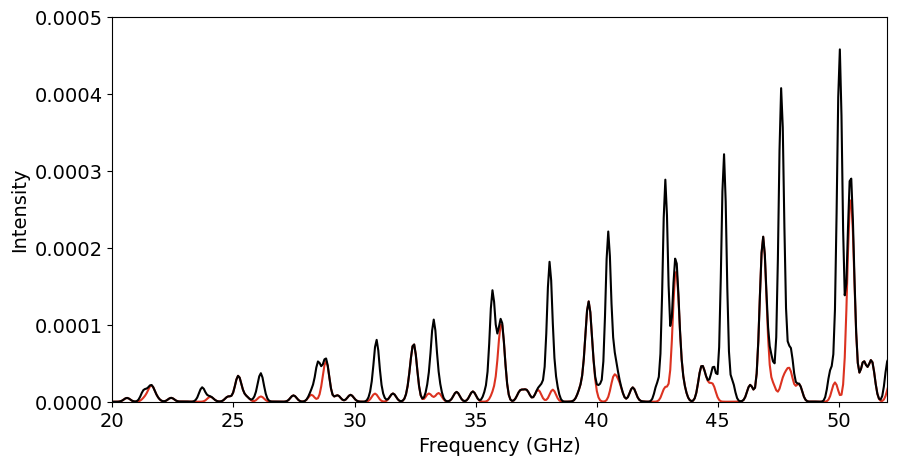

In [72]:
fig, ax = plt.subplots(figsize=(10,5))

#ax.plot(freqs_1,intens_2,color='#005AB5')
ax.plot(freqs_1,intens_1,color='#DC3220')
ax.plot(freqs_1,intens_tot,color='k')
ax.set_xlim(20,52)
ax.set_ylim(0,0.0005)

ax.set_xlabel('Frequency (GHz)', fontsize=14)
ax.set_ylabel('Intensity',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

plt.savefig('/Users/z5380625/Desktop/C3HNO2_ConformerSpectra_Total.pdf',bbox_inches='tight')
plt.show()

# Compare Plot: Phosphine

In [326]:
## load computed pgopher linelist 
comp_loc = '/Users/z5380625/Desktop'
comp_data = pd.read_csv(comp_loc+'/phosphine.csv')
comp_data


,SymmetricTop,Upper Manifold,J',Sym',#',Lower Manifold,"J""","Sym""","#""",Position,Intensity,Eupper,Elower,Spol,A,Width,Branch,Label
0,SymmetricTop,Ground,1,A+,1,Ground,0,A+,1,2.688071e+05,1.109599e-03,2.688071e+05,0.000000e+00,0.317552,0.000072,0,qR0(0),v=0 1 0 A2 - v=0 0 0 A1
1,SymmetricTop,Ground,2,A+,1,Ground,1,A+,1,5.376143e+05,8.324209e-03,8.064214e+05,2.688071e+05,0.635104,0.000689,0,qR0(1),v=0 2 0 A1 - v=0 1 0 A2
2,SymmetricTop,Ground,2,E,2,Ground,1,E,1,5.376143e+05,6.260898e-03,7.886836e+05,2.510693e+05,0.476328,0.000517,0,qR1(1),v=0 2 1 E - v=0 1 1 E
3,SymmetricTop,Ground,3,A+,2,Ground,2,A+,1,8.064214e+05,2.524032e-02,1.612843e+06,8.064214e+05,0.952656,0.002492,0,qR0(2),v=0 3 0 A2 - v=0 2 0 A1
4,SymmetricTop,Ground,3,E,1,Ground,2,E,1,8.064214e+05,1.418247e-02,1.541891e+06,7.354699e+05,0.529253,0.001385,0,qR2(2),v=0 3 2 E - v=0 2 2 E
5,SymmetricTop,Ground,3,E,2,Ground,2,E,2,8.064214e+05,2.249959e-02,1.595105e+06,7.886836e+05,0.846805,0.002215,0,qR1(2),v=0 3 1 E - v=0 2 1 E
6,SymmetricTop,Ground,4,E,3,Ground,3,E,2,1.075229e+06,4.841544e-02,2.670334e+06,1.595105e+06,1.190820,0.005743,0,qR1(3),v=0 4 1 E - v=0 3 1 E
7,SymmetricTop,Ground,4,A+,1,Ground,3,A+,1,1.075229e+06,2.311264e-02,2.528431e+06,1.453202e+06,0.555716,0.002680,0,qR3A2(3),v=0 4 3 A1 - v=0 3 3 A2
8,SymmetricTop,Ground,4,A+,2,Ground,3,A+,2,1.075229e+06,5.149680e-02,2.688071e+06,1.612843e+06,1.270208,0.006126,0,qR0(3),v=0 4 0 A1 - v=0 3 0 A2
9,SymmetricTop,Ground,4,E,2,Ground,3,E,1,1.075229e+06,3.906348e-02,2.617120e+06,1.541891e+06,0.952656,0.004595,0,qR2(3),v=0 4 2 E - v=0 3 2 E


In [327]:
## load observed pgopher linelist
comp_loc = '/Users/z5380625/Desktop'
observed_data = pd.read_csv(comp_loc+'/phosphine_observed.csv')
observed_data

,Molecule,Upper Manifold,J',Sym',#',Lower Manifold,"J""","Sym""","#""",Position,Intensity,Eupper,Elower,Spol,A,Width,Branch,Label
0,SymmetricTop,Ground,1,A+,1,Ground,0,A+,1,266960.256,3.772160e-04,2.669603e+05,0.000000e+00,0.109806,0.000024,0,qR0(0),v=0 1 0 A2 - v=0 0 0 A1
1,SymmetricTop,Ground,2,A+,1,Ground,1,A+,1,533920.512,2.831118e-03,8.008808e+05,2.669603e+05,0.219612,0.000233,0,qR0(1),v=0 2 0 A1 - v=0 1 0 A2
2,SymmetricTop,Ground,2,E,2,Ground,1,E,1,533920.512,2.128777e-03,7.848901e+05,2.509696e+05,0.164709,0.000175,0,qR1(1),v=0 2 1 E - v=0 1 1 E
3,SymmetricTop,Ground,3,E,2,Ground,2,E,2,800880.768,7.655733e-03,1.585771e+06,7.848901e+05,0.292817,0.000750,0,qR1(2),v=0 3 1 E - v=0 2 1 E
4,SymmetricTop,Ground,3,A+,2,Ground,2,A+,1,800880.768,8.590695e-03,1.601762e+06,8.008808e+05,0.329419,0.000844,0,qR0(2),v=0 3 0 A2 - v=0 2 0 A1
5,SymmetricTop,Ground,3,E,1,Ground,2,E,1,800880.768,4.821695e-03,1.537799e+06,7.369180e+05,0.183010,0.000469,0,qR2(2),v=0 3 2 E - v=0 2 2 E
6,SymmetricTop,Ground,4,A-,1,Ground,3,A-,1,1067841.024,7.854824e-03,2.525686e+06,1.457845e+06,0.192161,0.000908,0,qR3A1(3),v=0 4 3 A2 - v=0 3 3 A1
7,SymmetricTop,Ground,4,A+,1,Ground,3,A+,1,1067841.024,7.854824e-03,2.525686e+06,1.457845e+06,0.192161,0.000908,0,qR3A2(3),v=0 4 3 A1 - v=0 3 3 A2
8,SymmetricTop,Ground,4,A+,2,Ground,3,A+,2,1067841.024,1.754525e-02,2.669603e+06,1.601762e+06,0.439225,0.002075,0,qR0(3),v=0 4 0 A1 - v=0 3 0 A2
9,SymmetricTop,Ground,4,E,2,Ground,3,E,1,1067841.024,1.329428e-02,2.605640e+06,1.537799e+06,0.329419,0.001556,0,qR2(3),v=0 4 2 E - v=0 3 2 E


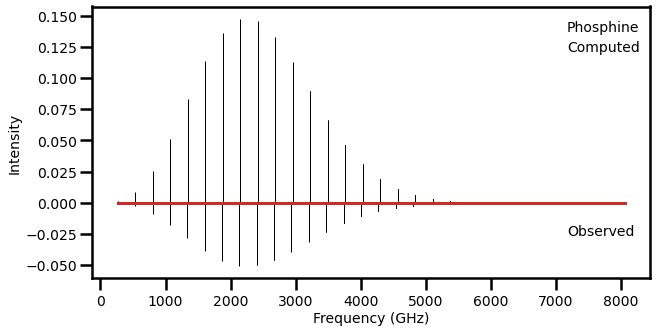

In [328]:
## plot pgopher vs CDMS

fig, ax = plt.subplots(figsize=(10,5))

markers,stems,base = ax.stem(comp_data['Position']/1e3,comp_data['Intensity'],markerfmt=' ',linefmt='k-')
plt.setp(stems, 'linewidth', 1)
markers,stems,base = ax.stem(observed_data['Position']/1e3,-observed_data['Intensity'],markerfmt=' ',linefmt='k-')
plt.setp(stems, 'linewidth', 1)
#ax.set_xlim(0,400)
#ax.set_ylim(-6,6)

ax.set_xlabel('Frequency (GHz)', fontsize=14)
ax.set_ylabel('Intensity',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)




ax.text(0.85, 0.95, 'Phosphine', transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
ax.text(0.85, 0.2, 'Observed', transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
ax.text(0.85, 0.875, 'Computed', transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
plt.savefig('/Users/z5380625/Documents/Research/2_BigData/Plots/phosphine_compare.pdf',bbox_inches='tight')
plt.show()



In [280]:
print((134400.4584420+134406.6906824)/2)

134403.5745622


In [330]:
QNs_list = []
for QNs_string in list(comp_data['Label'].values):
    QNs = QNs_string.split()
    QNs_list.append((int(QNs[1]),int(QNs[2]),QNs[3],int(QNs[6]),int(QNs[7]),QNs[8]))
print(len(QNs_list))
comp_data['Label'] = QNs_list


588


In [331]:
comp_data

,SymmetricTop,Upper Manifold,J',Sym',#',Lower Manifold,"J""","Sym""","#""",Position,Intensity,Eupper,Elower,Spol,A,Width,Branch,Label
0,SymmetricTop,Ground,1,A+,1,Ground,0,A+,1,2.688071e+05,1.109599e-03,2.688071e+05,0.000000e+00,0.317552,0.000072,0,qR0(0),"(1, 0, A2, 0, 0, A1)"
1,SymmetricTop,Ground,2,A+,1,Ground,1,A+,1,5.376143e+05,8.324209e-03,8.064214e+05,2.688071e+05,0.635104,0.000689,0,qR0(1),"(2, 0, A1, 1, 0, A2)"
2,SymmetricTop,Ground,2,E,2,Ground,1,E,1,5.376143e+05,6.260898e-03,7.886836e+05,2.510693e+05,0.476328,0.000517,0,qR1(1),"(2, 1, E, 1, 1, E)"
3,SymmetricTop,Ground,3,A+,2,Ground,2,A+,1,8.064214e+05,2.524032e-02,1.612843e+06,8.064214e+05,0.952656,0.002492,0,qR0(2),"(3, 0, A2, 2, 0, A1)"
4,SymmetricTop,Ground,3,E,1,Ground,2,E,1,8.064214e+05,1.418247e-02,1.541891e+06,7.354699e+05,0.529253,0.001385,0,qR2(2),"(3, 2, E, 2, 2, E)"
5,SymmetricTop,Ground,3,E,2,Ground,2,E,2,8.064214e+05,2.249959e-02,1.595105e+06,7.886836e+05,0.846805,0.002215,0,qR1(2),"(3, 1, E, 2, 1, E)"
6,SymmetricTop,Ground,4,E,3,Ground,3,E,2,1.075229e+06,4.841544e-02,2.670334e+06,1.595105e+06,1.190820,0.005743,0,qR1(3),"(4, 1, E, 3, 1, E)"
7,SymmetricTop,Ground,4,A+,1,Ground,3,A+,1,1.075229e+06,2.311264e-02,2.528431e+06,1.453202e+06,0.555716,0.002680,0,qR3A2(3),"(4, 3, A1, 3, 3, A2)"
8,SymmetricTop,Ground,4,A+,2,Ground,3,A+,2,1.075229e+06,5.149680e-02,2.688071e+06,1.612843e+06,1.270208,0.006126,0,qR0(3),"(4, 0, A1, 3, 0, A2)"
9,SymmetricTop,Ground,4,E,2,Ground,3,E,1,1.075229e+06,3.906348e-02,2.617120e+06,1.541891e+06,0.952656,0.004595,0,qR2(3),"(4, 2, E, 3, 2, E)"


In [341]:
comp_label_list = list(comp_data['Label'].values)
observed_label_list = list(observed_data['Label'].values)

comp_freq_list = list(comp_data['Position'].values)
observed_freq_list = list(observed_data['Position'].values)

n_4=0
n_6=0
n_10=0
n_20=0
n_30=0
sum_diff_sq_4 = 0
sum_diff_sq_6 = 0
sum_diff_sq_10 = 0
sum_diff_sq_20 = 0
sum_diff_sq_30 = 0
J_list = []

for label in observed_label_list:
    J_list.append(label[0])
    try:
        index_comp = comp_label_list.index(label)
        index_obs = observed_label_list.index(label)
        if label[0] < 4:
            
            sum_diff_sq_4 += (comp_freq_list[index_comp]-observed_freq_list[index_obs])**2
            n_4+=1
        elif label[0] < 6:
            sum_diff_sq_6 += (comp_freq_list[index_comp]-observed_freq_list[index_obs])**2
            n_6+=1
        elif label[0] < 10: 
            sum_diff_sq_10 += (comp_freq_list[index_comp]-observed_freq_list[index_obs])**2
            n_10+=1
        elif label[0] < 20: 
            sum_diff_sq_20 += (comp_freq_list[index_comp]-observed_freq_list[index_obs])**2
            n_20+=1
        elif label[0] < 30: 
            sum_diff_sq_30 += (comp_freq_list[index_comp]-observed_freq_list[index_obs])**2
            n_30+=1
        
    except:
        #index_obs = observed_label_list.index(label)
        #sum_diff_sq += (observed_freq_list[index_obs])**2
        print(label,index_obs,index_comp)
print(np.sqrt(sum_diff_sq_4/n_4))
print(np.sqrt(sum_diff_sq_6/n_6))
print(np.sqrt(sum_diff_sq_10/n_10))
print(np.sqrt(sum_diff_sq_20/n_20))
print(np.sqrt(sum_diff_sq_30/n_30))

(30, 6, 'A2', 29, 6, 'A1') 567 567
(30, 3, 'A2', 29, 3, 'A1') 567 567
(30, 6, 'A1', 29, 6, 'A2') 576 574
(30, 3, 'A1', 29, 3, 'A2') 576 574
(30, 8, 'E', 29, 8, 'E') 589 587
(30, 7, 'E', 29, 7, 'E') 589 587
(30, 5, 'E', 29, 5, 'E') 589 587
(30, 4, 'E', 29, 4, 'E') 589 587
4523.945765704204
8445.188377827139
14318.855114947659
28343.24333956385
46190.67790604041


# Compare Rotational Constants

In [6]:
data_all = pd.read_csv('/Users/z5380625/Documents/Research/2_BigData/wB97XD_6-31pGs_2to12Atoms_DataFile.csv')

In [7]:
data_all

,Formula,SMILES,# Atoms,Conf#,Rotamer Degeneracy,Relative Energy [kJ/mol],RawFreq [cm-1],ScaledFreq [cm-1],Intensity,mu_a [D],mu_b [D],mu_c [D],mu_tot [D],mu_amu_bmu_c,A [cm-1],B [cm-1],C [cm-1]
0,C2H2,C#C,4,CONF1,1,0.000000,"[646.823, 646.823, 781.186, 781.186, 2094.4924...","[627.408464707117, 627.408464707117, 757.73852...","[0.0, 0.0, 121.711, 121.711, 0.0, 78.7578, 0.0]",1.000064e-07,7.070929e-08,2.121294e-07,2.449489e-07,1.500048e-21,0.000000,1.176132,1.176132
1,C2H2O2,O=CC=O,6,CONF1,1,0.000000,"[135.2425, 344.1686, 562.8768, 819.2563, 1082....","[131.1831664739075, 333.8383034097394, 545.981...","[39.6971, 57.1156, 0.0, 2.8592, 0.0, 0.0, 9.97...",-9.993482e-08,-1.999206e-07,-2.840000e-05,2.840088e-05,-5.674043e-19,1.851132,0.159769,0.147075
2,C2H2OS_1,C#CSO,6,CONF1,1,0.000000,"[169.681, 308.5233, 426.6421, 447.0352, 535.25...","[164.58798728549903, 299.2629049668507, 413.83...","[1.9259, 39.2648, 69.7936, 51.4418, 88.6165, 1...",8.384767e-01,4.741034e-01,-1.619398e+00,1.884215e+00,-6.437508e-01,0.651762,0.131982,0.110874
3,C2H2OS_2,O=CC=S,6,CONF1,1,0.000000,"[113.8289, 299.4532, 494.9418, 804.9522, 1030....","[110.41230041031311, 290.4650460228428, 480.08...","[19.7015, 19.7084, 6.6693, 24.5125, 3.3114, 52...",-1.100192e+00,-1.539587e-01,1.074470e-06,1.110912e+00,1.819982e-07,1.724272,0.095080,0.090111
4,C2H2O_1,C1=CO1,5,CONF1,1,0.000000,"[178.0878, 558.4827, 658.0701, 903.7008, 972.1...","[172.74245532559618, 541.7197183348234, 638.31...","[3.9695, 106.9234, 0.0, 62.6865, 6.0178, 15.87...",2.678899e+00,-1.742808e-03,-2.484554e-04,2.678900e+00,1.159990e-06,1.113649,0.894412,0.496031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,CH6N4S,S=C(NN)NN,12,CONF3,3,0.381222,"[120.1297, 152.3048, 173.6249, 228.4222, 248.1...","[116.5239805058363, 147.73333776863922, 168.41...","[3.4741, 4.0926, 15.0403, 27.8953, 0.4171, 15....",1.529581e+00,2.177378e+00,-1.336210e-01,2.664291e+00,-4.450213e-01,0.153448,0.072575,0.050080
2601,CH6N4S,S=C(NN)NN,12,CONF4,6,7.011391,"[50.2284, 123.7789, 210.6516, 245.2619, 286.16...","[48.7207834735236, 120.0636489613631, 204.3288...","[2.9089, 2.2586, 2.6271, 2.8779, 8.1726, 34.14...",3.063876e+00,2.980603e+00,-1.284141e-01,4.276426e+00,-1.172703e+00,0.124241,0.079581,0.049307
2602,CH6NO3P,O=P(O)(CN)O,12,CONF4,4,0.167507,"[100.231, 167.6334, 199.504, 294.937, 318.2676...","[97.222544383949, 162.6018464520186, 193.51584...","[4.6669, 69.278, 33.2953, 12.4952, 10.2199, 13...",-3.378390e+00,-3.583219e+00,-1.105149e+00,5.047210e+00,-1.337839e+01,0.145056,0.078240,0.076857
2603,CH6NO3P,O=P(O)(CN)O,12,CONF2,2,0.504358,"[94.6502, 101.4132, 180.2612, 250.7721, 293.29...","[91.8092533293058, 98.36926038968281, 174.8506...","[1.3178, 36.4402, 5.4203, 8.7849, 89.8099, 88....",8.236667e-01,-8.151136e-01,-1.613386e+00,1.986417e+00,1.083198e+00,0.141872,0.075997,0.074935


In [9]:
data_compare = pd.read_csv('/Users/z5380625/Documents/Research/2_BigData/rot_const_compare_obs.csv', engine='python')

In [10]:
data_compare

,Formula_ID,mol_name,SMILES,obs_A,obs_B,obs_C,obs_mu_A,obs_mu_B,obs_mu_C
0,CH2O,formaldehyde,C=O,281970.58,38833.99,34004.24,2.33,0.00,0.00
1,C4H3N_5,but-3-ynenitrile,C#CCC#N,19820.19,2909.59,2573.23,3.23,2.34,0.00
2,CH4O,methanol,OC,127523.40,24692.50,23760.30,0.90,-1.44,0.00
3,H3N,ammonia,N,298192.92,298192.92,186695.86,0.00,0.00,1.47
4,CH2O2,formic acid,O=CO,77512.24,12055.02,10416.20,1.42,0.21,0.00
5,C2H3N_2,acetonitrile,N#CC,158099.00,9198.90,9198.90,3.92,0.00,0.00
6,C2H4O_1,acetaldehyde,O=CC,56507.20,10454.08,9089.09,2.42,-1.26,0.00
7,C3H6O_1,2-methyloxirane,CC1CO1,18023.89,6682.14,5951.39,0.95,1.67,0.56
8,H3NO,hydroxylamine,NO,190976.20,25218.73,25156.55,0.59,0.00,0.06
9,H3P,phosphine,P,133480.13,133480.13,117489.43,0.00,0.00,0.57


In [12]:
formula_id_list = data_compare['Formula_ID'].values
diffs_A = []
diffs_B = []
diffs_C = []
for formula in formula_id_list:
    
    A_obs = data_compare.loc[(data_compare['Formula_ID']==formula)]['obs_A'].values
    B_obs = data_compare.loc[(data_compare['Formula_ID']==formula)]['obs_B'].values
    C_obs = data_compare.loc[(data_compare['Formula_ID']==formula)]['obs_C'].values
    
    
    A_comp = data_all.loc[(data_all['Formula']==formula)&(data_all['Conf#']=='CONF1')]['A [cm-1]'].values*29979.2458
    B_comp = data_all.loc[(data_all['Formula']==formula)&(data_all['Conf#']=='CONF1')]['B [cm-1]'].values*29979.2458
    C_comp = data_all.loc[(data_all['Formula']==formula)&(data_all['Conf#']=='CONF1')]['C [cm-1]'].values*29979.2458
    

    
    diffs_A.append(float(A_comp-A_obs))
    diffs_B.append(float(B_comp-B_obs))
    diffs_C.append(float(C_comp-C_obs))


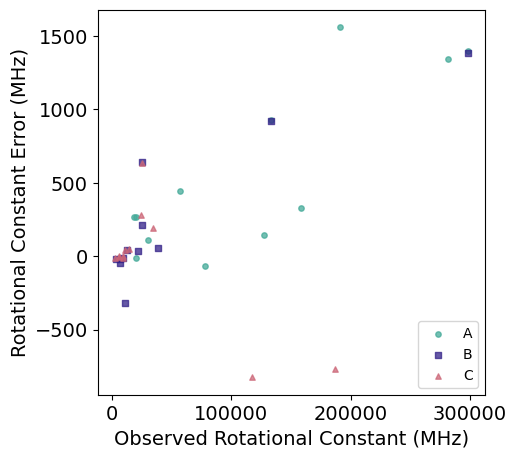

In [13]:
freqs_A = data_compare['obs_A'].values
freqs_B = data_compare['obs_B'].values
freqs_C = data_compare['obs_C'].values

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(freqs_A, diffs_A, color='#44AA99',s=15,marker='o',label='A',alpha=0.75)
ax.scatter(freqs_B, diffs_B, color='#332288',s=15,marker='s',label='B',alpha=0.75)
ax.scatter(freqs_C, diffs_C, color='#CC6677',s=15,marker='^',label='C',alpha=0.75)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_xlabel('Observed Rotational Constant (MHz)',fontsize=14)
ax.set_ylabel('Rotational Constant Error (MHz)',fontsize=14)
ax.legend(loc='lower right')

plt.savefig('/Users/z5380625/Documents/Research/2_BigData/Plots/ABC_Error_Compare_2to12Atoms.pdf',bbox_inches='tight')
plt.show()

In [14]:
for i in range(0,len(formula_id_list),1):
    print(formula_id_list[i],diffs_A[i],diffs_B[i],diffs_C[i])

CH2O 1344.351713799988 58.46156580000388 193.64878640000097
C4H3N_5 -15.076442999998108 -16.985626500003036 -9.168625600000723
CH4O 143.57759280000755 212.99466609999945 280.7119640000019
H3N 1399.7995935000363 1385.6293428000063 -770.6940808999934
CH2O2 -64.51630500001193 39.65821039999719 44.824903099999574
C2H3N_2 328.05999390000943 -10.747934900002292 -10.76005289999921
C2H4O_1 442.29955170000176 -317.8147668999991 0.13596309999775258
C3H6O_1 265.9432256 -19.035546600001908 2.5197253999995155
H3NO 1559.849228099978 645.3689047000007 635.8069032000021
H3P 926.5606823999842 920.3284419999982 -823.7412592000037
C3H4_1 109.35874989999866 36.353921300000366 52.70936830000028
C2H4O2_4 269.81165970000075 -45.939339200001996 -2.669714199999362


A r-squared:  0.6967285843087077
[0.00480332] 7.18184414418306
B r-squared:  0.8203032374020623
C r-squared:  0.6988949994927895
tot r-squared:  0.7590975188510757


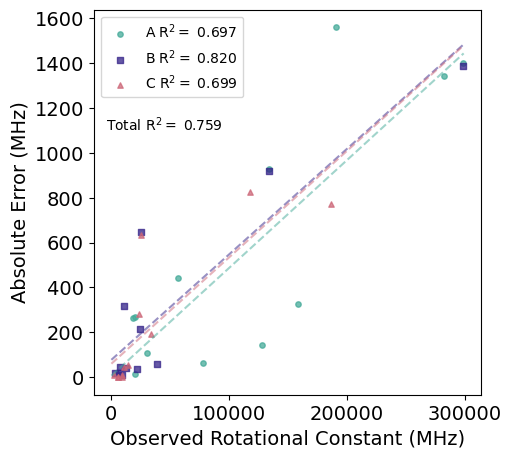

In [20]:
## Abs error ##
fig, ax = plt.subplots(figsize=(5,5))
freqs = np.arange(0,300000,1000)

A_model = LinearRegression().fit(np.array(freqs_A).reshape(-1,1), np.array(np.abs(diffs_A)))
A_rsq = A_model.score(np.array(freqs_A).reshape(-1,1), np.array(np.abs(diffs_A)))
print('A r-squared: ',A_rsq)
ax.scatter(freqs_A, np.abs(diffs_A), color='#44AA99',s=15,marker='o',label=r'A R$^2 =$ {:.3f}'.format(A_rsq),alpha=0.75)
ax.plot(freqs,A_model.coef_*freqs+A_model.intercept_,color='#44AA99',linestyle='dashed',alpha=0.5)
print(A_model.coef_,A_model.intercept_)


B_model = LinearRegression().fit(np.array(freqs_B).reshape(-1,1), np.array(np.abs(diffs_B)))
B_rsq = B_model.score(np.array(freqs_B).reshape(-1,1), np.array(np.abs(diffs_B)))
print('B r-squared: ',B_rsq)
ax.scatter(freqs_B, np.abs(diffs_B), color='#332288',s=15,marker='s',label=r'B R$^2 =$ {:.3f}'.format(B_rsq),alpha=0.75)
ax.plot(freqs,B_model.coef_*freqs+B_model.intercept_,color='#332288',linestyle='dashed',alpha=0.5)

C_model = LinearRegression().fit(np.array(freqs_C).reshape(-1,1), np.array(np.abs(diffs_C)))
C_rsq = C_model.score(np.array(freqs_C).reshape(-1,1), np.array(np.abs(diffs_C)))
print('C r-squared: ',C_rsq)
ax.scatter(freqs_C, np.abs(diffs_C), color='#CC6677',s=15,marker='^',label=r'C R$^2 =$ {:.3f}'.format(C_rsq),alpha=0.75)
ax.plot(freqs,C_model.coef_*freqs+C_model.intercept_,color='#CC6677',linestyle='dashed',alpha=0.5)

freqs_tot = np.concatenate((freqs_A,freqs_B,freqs_C),axis=None)
diffs_tot = np.concatenate((diffs_A,diffs_B,diffs_C),axis=None)
tot_model = LinearRegression().fit(np.array(freqs_tot).reshape(-1,1), np.array(np.abs(diffs_tot)))
tot_rsq = tot_model.score(np.array(freqs_tot).reshape(-1,1), np.array(np.abs(diffs_tot)))
print('tot r-squared: ',tot_rsq)
#ax.plot(freqs_tot,tot_model.coef_*freqs_tot+tot_model.intercept_,color='k',linestyle='dashed',alpha=0.5)
ax.text(-5000,1100,r'Total R$^2 =$ {:.3f}'.format(tot_rsq))

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_xlabel('Observed Rotational Constant (MHz)',fontsize=14)
ax.set_ylabel('Absolute Error (MHz)',fontsize=14)
ax.legend()#loc='lower right')

plt.savefig('/Users/z5380625/Documents/Research/2_BigData/Plots/ABC_AbsError_Compare_2to12Atoms.pdf',bbox_inches='tight')
plt.show()

In [3]:
print('A RMSD: ', np.sqrt(np.sum(np.array(diffs_A)**2)/len(diffs_A)))
print('B RMSD: ', np.sqrt(np.sum(np.array(diffs_B)**2)/len(diffs_B)))
print('C RMSD: ', np.sqrt(np.sum(np.array(diffs_C)**2)/len(diffs_C)))
print('Total RMSD: ', np.sqrt(np.sum(np.array(diffs_tot)**2)/len(diffs_tot)))


NameError: name 'diffs_A' is not defined